# Setup notebook

In [17]:
from helper_code import *
import numpy as np, os, sys, joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

# Explore the Distribution of the Lengths of Signal

In [18]:
dirs = ['data/cpsc', 'data/cpsc2', 'data/georgia', 'data/ptb', 'data/ptbxl', 'data/stpeters', 'data/chapman', 'data/ningbo']

data/cpsc
Total Size: 6877
Lengths. Max is 10.0


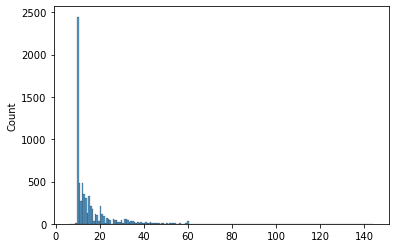

Frequencies. Max is 500.0


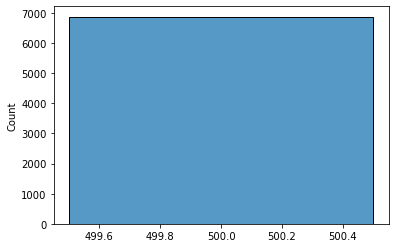

-----------------------------------------------------------------------------
data/cpsc2
Total Size: 3453
Lengths. Max is 10.0


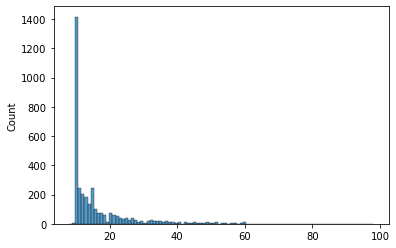

Frequencies. Max is 500.0


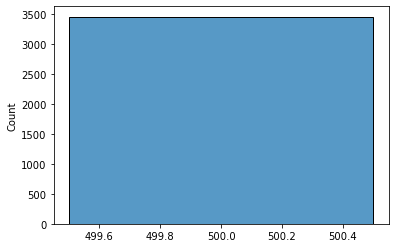

-----------------------------------------------------------------------------
data/georgia
Total Size: 10344
Lengths. Max is 10.0


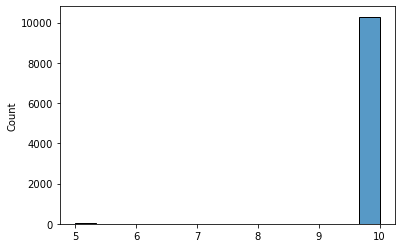

Frequencies. Max is 500.0


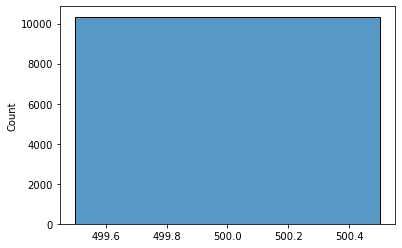

-----------------------------------------------------------------------------
data/ptb
Total Size: 516
Lengths. Max is 115.2


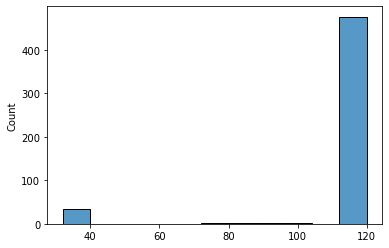

Frequencies. Max is 1000.0


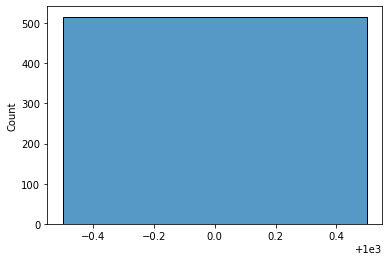

-----------------------------------------------------------------------------
data/ptbxl
Total Size: 21837
Lengths. Max is 10.0


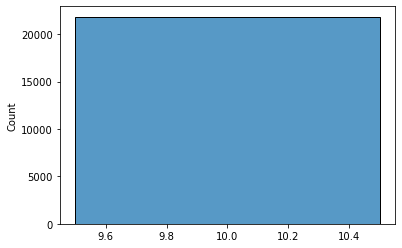

Frequencies. Max is 500.0


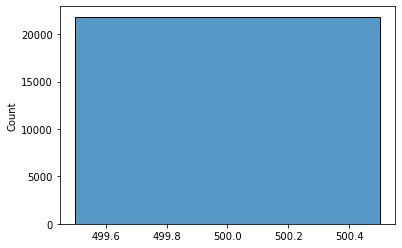

-----------------------------------------------------------------------------
data/stpeters
Total Size: 74
Lengths. Max is 1800.0


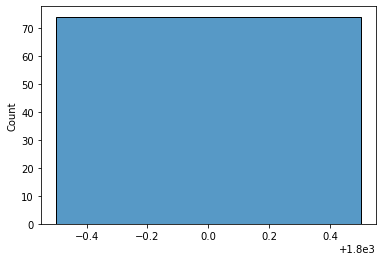

Frequencies. Max is 257.0


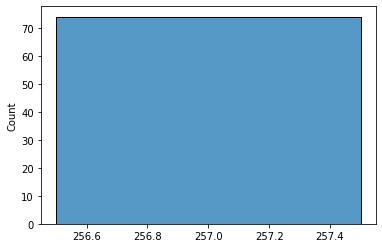

-----------------------------------------------------------------------------
data/chapman
Total Size: 10247
Lengths. Max is 10.0


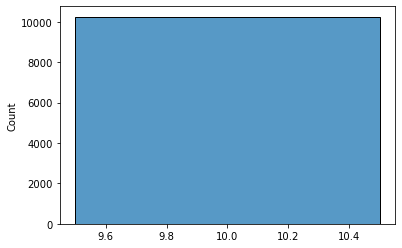

Frequencies. Max is 500.0


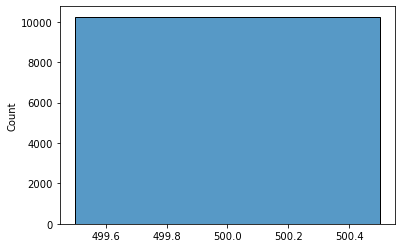

-----------------------------------------------------------------------------
data/ningbo
Total Size: 34905
Lengths. Max is 10.0


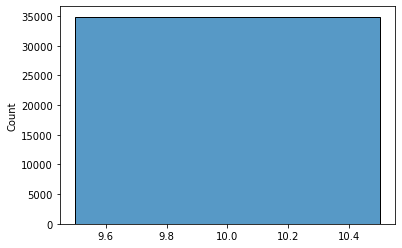

Frequencies. Max is 500.0


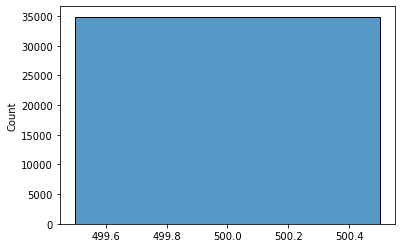

-----------------------------------------------------------------------------


In [20]:
for folder in dirs:
    print(folder)
    
    data_directory = folder
    headers, recordings = find_challenge_files(data_directory)

    length_arr, freq_arr = [], []

    for header_file in headers:
        header = load_header(header_file)

        freq = get_frequency(header)
        samples = get_num_samples(header)
        length = samples/freq

        freq_arr.append(freq)
        length_arr.append(length)

    print("Total Size: {}".format(len(length_arr)))
    print("Lengths. Max is {}".format(mode(length_arr)))
    sns.histplot(data=length_arr)
    plt.show()
    print("Frequencies. Max is {}".format(mode(freq_arr)))
    sns.histplot(data=freq_arr)
    plt.show()
    
    print("-----------------------------------------------------------------------------")

# Extract Relevant Recordings

Since PTB and St Petersburg has vastly varying lengths of ECGs and frequency, they are excluded from the final database

A dataframe is constructed with the recording filename and labels for Afib and Aflutter

In [21]:
new_dirs = ['data/cpsc', 'data/cpsc2', 'data/georgia', 'data/ptbxl', 'data/chapman', 'data/ningbo']

In [22]:
dirs_dict = {'data/cpsc':'CP', 'data/cpsc2':'C2', 'data/georgia':'GE', 'data/ptbxl':'PT', 'data/chapman':'CH', 'data/ningbo':'NI'}

In [23]:
data_arr = []

for folder in new_dirs:    
    data_directory = folder
    headers, recordings = find_challenge_files(data_directory)

    for i in range(len(headers)):
        header = load_header(headers[i])
        samples = get_num_samples(header)
        
        # only data less than 20s is kept. clip the datasets longer than 10s to its first 10s
        if samples > 10000 or samples < 5000:
            continue
                
        entry = [recordings[i], 0, 0, 0, 0, '']
        
        header = load_header(headers[i])
        labels = get_labels(header)
        
        if '164889003' in labels:
            entry[1] = 1
        if '164890007' in labels:
            entry[2] = 1
        if '164865005' in labels:
            entry[3] = 1
        if '426761007' in labels:
            entry[4] = 1
        
        entry[5] = dirs_dict[data_directory]

        data_arr.append(entry)

In [24]:
df = pd.DataFrame(data_arr, columns = ['Recording', 'Afib', 'Afl', 'MI', 'SVT', 'DB'])
df

,Recording,Afib,Afl,MI,SVT,DB
0,data/cpsc/A2112.mat,0,0,0,0,CP
1,data/cpsc/A4563.mat,0,0,0,0,CP
2,data/cpsc/A0705.mat,0,0,0,0,CP
3,data/cpsc/A6374.mat,0,0,0,0,CP
4,data/cpsc/A6412.mat,0,0,0,0,CP
...,...,...,...,...,...,...
85738,data/ningbo/JS38132.mat,0,0,0,0,NI
85739,data/ningbo/JS37201.mat,0,0,0,0,NI
85740,data/ningbo/JS28321.mat,0,0,0,0,NI
85741,data/ningbo/JS41397.mat,0,0,0,0,NI


In [25]:
recording_file = df.iloc[37438]['Recording']
recording = load_recording(recording_file)

print("Recording is of type {}".format(type(recording)))
print("Recording shape: {}".format(recording.shape))

Recording is of type <class 'numpy.ndarray'>
Recording shape: (12, 5000)


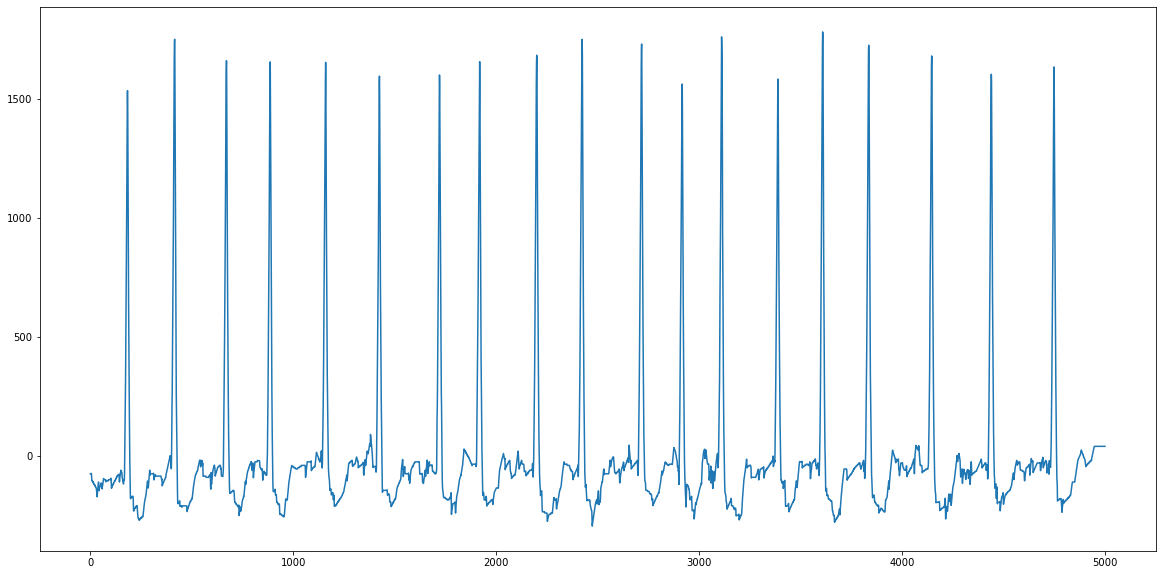

In [26]:
plt.figure(figsize=(20,10))
plt.plot(list(range(len(recording[1]))), recording[1])

In [35]:
df[df['Afib'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
6,data/cpsc/A4205.mat,1,0,0,0,CP
13,data/cpsc/A6360.mat,1,0,0,0,CP
15,data/cpsc/A2106.mat,1,0,0,0,CP
29,data/cpsc/A5655.mat,1,0,0,0,CP
30,data/cpsc/A3224.mat,1,0,0,0,CP
...,...,...,...,...,...,...
50808,data/chapman/JS08754.mat,1,0,0,0,CH
50824,data/chapman/JS04191.mat,1,0,0,0,CH
50826,data/chapman/JS08973.mat,1,0,0,0,CH
50830,data/chapman/JS03198.mat,1,0,0,0,CH


In [43]:
df[df['Afl'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
5716,data/cpsc2/Q1204.mat,0,1,0,0,C2
5741,data/cpsc2/Q2533.mat,0,1,0,0,C2
5756,data/cpsc2/Q2254.mat,0,1,0,0,C2
5775,data/cpsc2/Q0127.mat,0,1,0,0,C2
5975,data/cpsc2/Q2653.mat,0,1,0,0,C2
...,...,...,...,...,...,...
85698,data/ningbo/JS19856.mat,0,1,0,0,NI
85702,data/ningbo/JS18590.mat,0,1,0,1,NI
85709,data/ningbo/JS19842.mat,0,1,0,0,NI
85715,data/ningbo/JS18584.mat,0,1,0,0,NI


In [14]:
df[df['MI'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
5667,data/cpsc2/Q3003.mat,0,0,1,0,C2
5669,data/cpsc2/Q3017.mat,0,0,1,0,C2
5677,data/cpsc2/Q1628.mat,0,0,1,0,C2
5682,data/cpsc2/Q2862.mat,0,0,1,0,C2
5683,data/cpsc2/Q2876.mat,0,0,1,0,C2
...,...,...,...,...,...,...
81014,data/ningbo/JS23064.mat,0,0,1,1,NI
81354,data/ningbo/JS10848.mat,0,0,1,0,NI
82743,data/ningbo/JS12874.mat,0,0,1,0,NI
84715,data/ningbo/JS19705.mat,0,1,1,0,NI


In [15]:
df[df['SVT'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
6246,data/cpsc2/Q0645.mat,0,0,0,1,C2
7500,data/cpsc2/Q0348.mat,0,0,1,1,C2
7571,data/cpsc2/Q0229.mat,0,0,0,1,C2
8549,data/georgia/E03335.mat,0,0,0,1,GE
8672,data/georgia/E05195.mat,0,0,0,1,GE
...,...,...,...,...,...,...
83946,data/ningbo/JS23063.mat,0,0,0,1,NI
85218,data/ningbo/JS12526.mat,0,0,0,1,NI
85479,data/ningbo/JS10655.mat,0,0,0,1,NI
85590,data/ningbo/JS18547.mat,0,1,0,1,NI


In [16]:
df.to_csv('full_dataset.csv', index=False)